In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028933.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028394.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027799.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028100.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027960.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026412.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0024872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000

In [24]:
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau
from imblearn.over_sampling import RandomOverSampler 
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# **Loading the Dataset**

In [25]:
FilePath = "../input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv"
dataSet = pd.read_csv(FilePath)

In [26]:
Label = dataSet["label"]
Data = dataSet.drop(columns=["label"]) 

**Count labels using countlabel() method**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

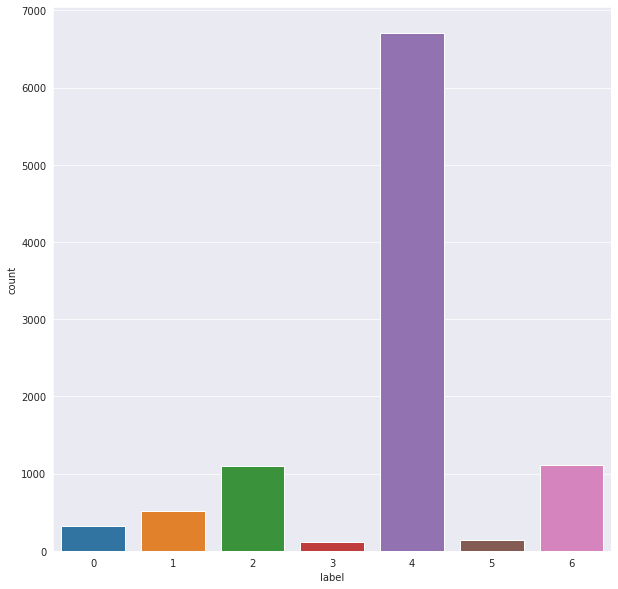

In [27]:
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(Label)

**As you see the data is imbalanced , so let's make it balanced**

In [28]:
oversample = RandomOverSampler()
Data,Label  = oversample.fit_resample(Data,Label)
Data = np.array(Data).reshape(-1,28,28,3)
print('Shape of Data :',Data.shape)

Shape of Data : (46935, 28, 28, 3)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

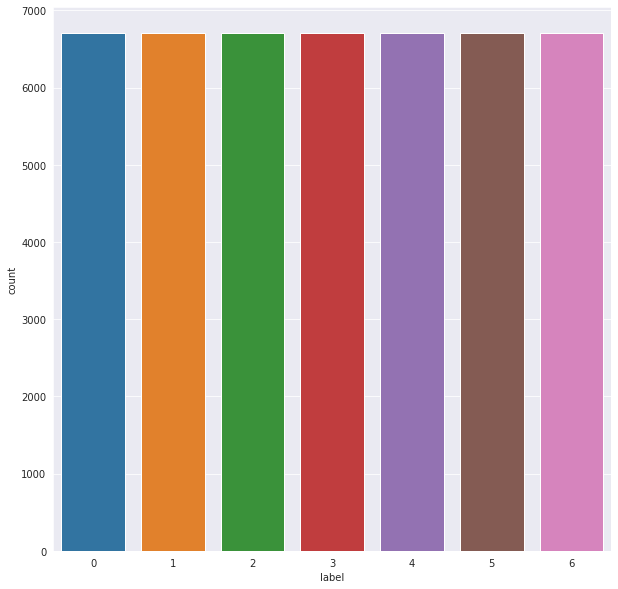

In [29]:
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(Label)

In [30]:
Label = np.array(Label)
Label

array([2, 2, 2, ..., 6, 6, 6])

In [31]:
classes = {4: ('nv', ' melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'), 
           1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}

**SPLIT DATA INTO TRAIN AND TEST DATA**

***

In [32]:
X_train , X_test , y_train , y_test = train_test_split(Data , Label , test_size = 0.25 , random_state = 49)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35201, 28, 28, 3)
(11734, 28, 28, 3)
(35201,)
(11734,)


**Plot images**

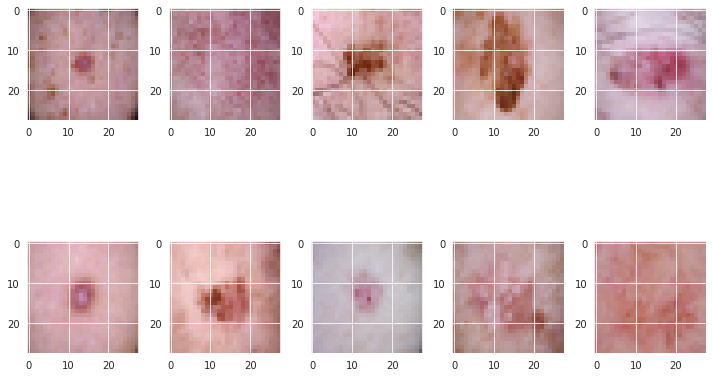

In [34]:
f , ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0 
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_train[k].reshape(28,28,3))
        k = k + 1
    plt.tight_layout()

**Convert lables into One-hot encoding**

In [35]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [36]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


**use Data Augmentation to avoid Overfitting , using by ImageDataGenerator method**

In [37]:
datagen = ImageDataGenerator(rescale=(1./255)
                             ,rotation_range=10
                             ,zoom_range = 0.1
                             ,width_shift_range=0.1
                             ,height_shift_range=0.1)
testgen = ImageDataGenerator(rescale=(1./255))

**Learing Rate Decay**

In [38]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy'
                                            , patience = 2
                                            , verbose=1
                                            ,factor=0.5
                                            , min_lr=0.00001)

# **Build Our Model**

In [39]:
def My_Model():
  input_ = keras.layers.Input(shape = [28,28,3])
  x = keras.layers.Conv2D(32 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal')(input_)
  x = keras.layers.MaxPooling2D()(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(64 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal')(x)
  x = keras.layers.Conv2D(64 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal')(x)
  x = keras.layers.MaxPooling2D()(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(128 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal')(x)
  x = keras.layers.Conv2D(128 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal')(x)
  x = keras.layers.MaxPooling2D()(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Conv2D(256 , (3,3) , activation='relu' ,padding='same', kernel_initializer='he_normal')(x)
  x = keras.layers.Conv2D(256 , (3,3) , activation='relu' ,padding='same', kernel_initializer='he_normal')(x)
  x = keras.layers.MaxPooling2D()(x)
  flatten  = keras.layers.Flatten()(x)
  classifier = keras.layers.Dropout(rate = 0.2)(flatten)
  classifier = keras.layers.Dense(units = 256 , activation = 'relu' , kernel_initializer = 'he_normal')(classifier)
  classifier = keras.layers.BatchNormalization()(classifier)
  classifier = keras.layers.Dense(units = 128 , activation = 'relu' , kernel_initializer = 'he_normal')(classifier)
  classifier = keras.layers.BatchNormalization()(classifier)
  classifier = keras.layers.Dense(units = 64 , activation = 'relu' , kernel_initializer = 'he_normal')(classifier)
  classifier = keras.layers.BatchNormalization()(classifier) 
  classifier = keras.layers.Dense(units = 32 , activation = 'relu' , kernel_initializer = 'he_normal' , kernel_regularizer=keras.regularizers.L1L2())(classifier)
  classifier = keras.layers.BatchNormalization()(classifier) 
  classifier = keras.layers.Dense(units = 7 , activation='softmax' ,kernel_initializer="glorot_uniform" , name = 'classifier')(classifier)

  return keras.models.Model(inputs = input_  ,outputs =  classifier  )
  

In [40]:
model = My_Model()

In [41]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 3)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0   

**plot model to see connected layers**

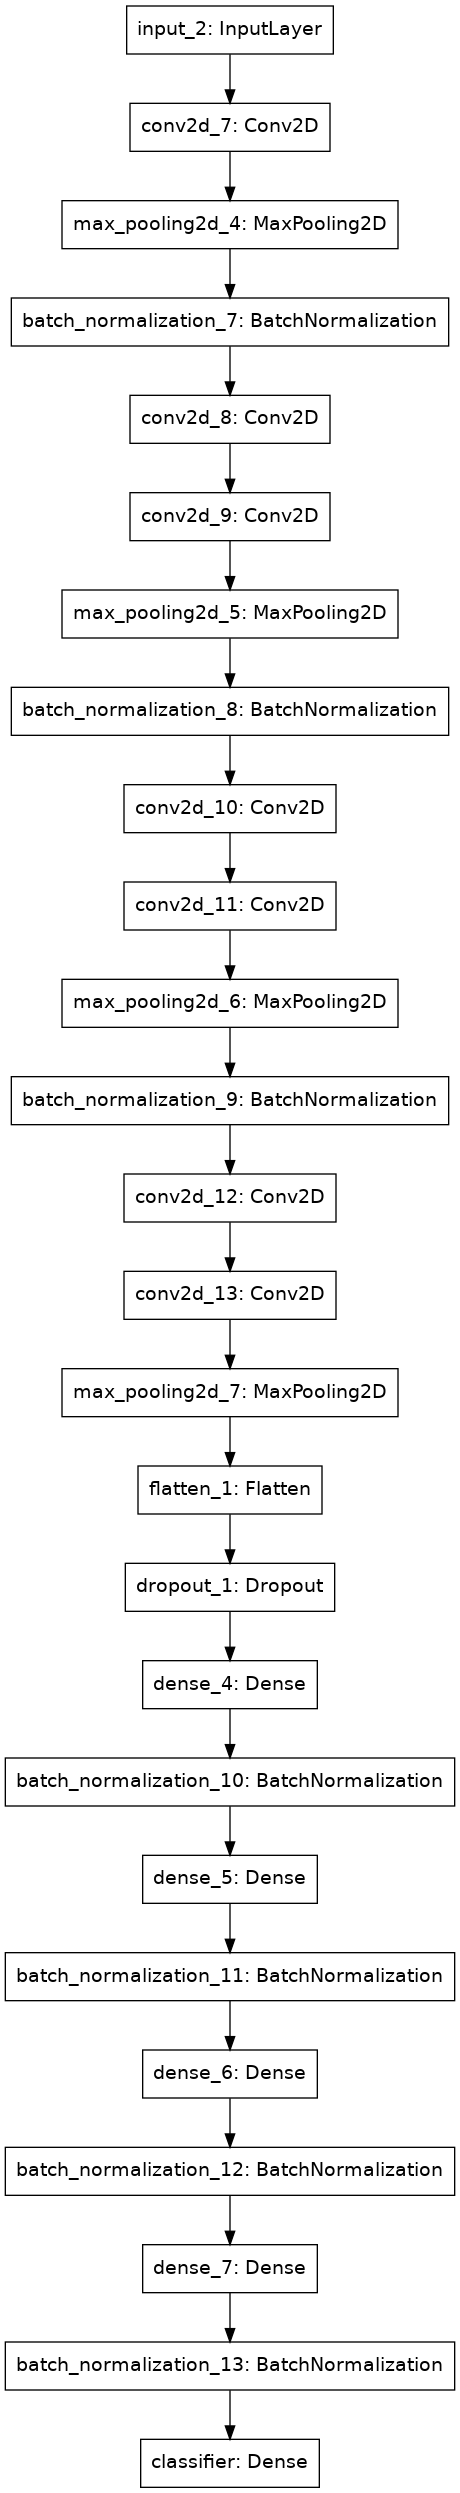

In [42]:
keras.utils.plot_model(model)

In [43]:
model.compile(optimizer='adam' , loss = keras.losses.CategoricalCrossentropy() ,metrics = ['accuracy'])

**Training step**

In [44]:
history = model.fit(X_train ,
                    y_train ,
                    epochs=25 ,
                    batch_size=128,
                    validation_data=(X_test , y_test) ,
                    callbacks=[learning_rate_reduction])

Epoch 1/25
276/276 [==============================] - 16s 52ms/step - loss: 1.4102 - accuracy: 0.4761 - val_loss: 0.6945 - val_accuracy: 0.7478
Epoch 2/25
276/276 [==============================] - 14s 49ms/step - loss: 0.4847 - accuracy: 0.8266 - val_loss: 0.5037 - val_accuracy: 0.8162
Epoch 3/25
276/276 [==============================] - 14s 50ms/step - loss: 0.2904 - accuracy: 0.8970 - val_loss: 0.3647 - val_accuracy: 0.8776
Epoch 4/25
276/276 [==============================] - 14s 49ms/step - loss: 0.2074 - accuracy: 0.9254 - val_loss: 0.2653 - val_accuracy: 0.9040
Epoch 5/25
276/276 [==============================] - 14s 49ms/step - loss: 0.1626 - accuracy: 0.9426 - val_loss: 0.4711 - val_accuracy: 0.8610
Epoch 6/25
276/276 [==============================] - 14s 50ms/step - loss: 0.1134 - accuracy: 0.9603 - val_loss: 0.2815 - val_accuracy: 0.9111
Epoch 7/25
276/276 [==============================] - 14s 49ms/step - loss: 0.0943 - accuracy: 0.9679 - val_loss: 0.3666 - val_accuracy:

In [45]:
model.evaluate(X_test , y_test)

367/367 [==============================] - 4s 12ms/step - loss: 0.1139 - accuracy: 0.9818


[0.11387206614017487, 0.9817624092102051]

# Analysis after Training

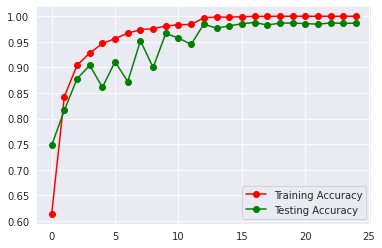

In [46]:
plt.plot(history.history["accuracy"] , 'ro-' , label = "Training Accuracy")
plt.plot(history.history["val_accuracy"] , 'go-' , label = "Testing Accuracy")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

actual_values = [actual_1, actual_2, ..., actual_n]
predicted_values = [predicted_1, predicted_2, ..., predicted_n]

mse = mean_squared_error(actual_values, predicted_values)
sse = sum((actual - predicted)**2 for actual, predicted in zip(actual_values, predicted_values))


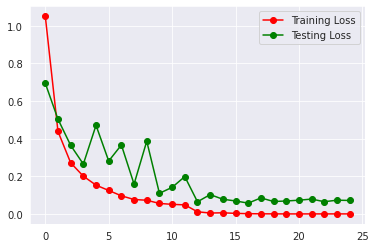

In [47]:
plt.plot(history.history["loss"] , 'ro-' , label = "Training Loss")
plt.plot(history.history["val_loss"] , 'go-' , label = "Testing Loss")
plt.legend()
plt.show()

In [48]:
y_pred  = model.predict(X_test).round()

In [49]:
target_names = [f"{classes[i]}" for i in range(7)]
print(classification_report(y_test , y_pred , target_names =target_names ))

                                                               precision    recall  f1-score   support

('akiec', 'Actinic keratoses and intraepithelial carcinomae')       1.00      1.00      1.00      1667
                             ('bcc', ' basal cell carcinoma')       0.99      1.00      1.00      1689
                     ('bkl', 'benign keratosis-like lesions')       0.97      1.00      0.99      1651
                                     ('df', 'dermatofibroma')       1.00      1.00      1.00      1629
                                  ('nv', ' melanocytic nevi')       0.99      0.92      0.95      1663
              ('vasc', ' pyogenic granulomas and hemorrhage')       1.00      1.00      1.00      1680
                                          ('mel', 'melanoma')       0.96      0.99      0.97      1755

                                                    micro avg       0.99      0.99      0.99     11734
                                                    macro avg       0.9

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

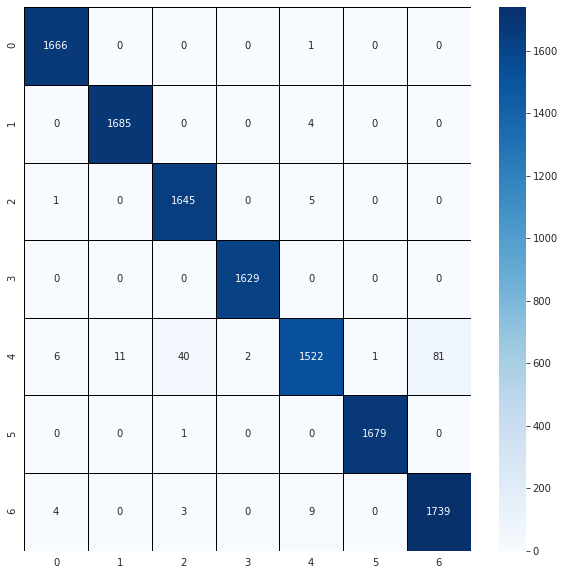

In [50]:
cm = confusion_matrix(y_test.argmax(axis = 1) , y_pred.argmax(axis = 1))
cm = pd.DataFrame(cm , index = [i for i in range(7)] , columns = [i for i in range(7)])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

**Plot Test Images**

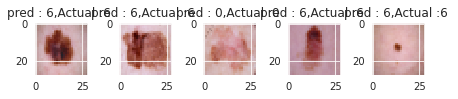

In [51]:
correct = np.nonzero(y_pred == y_test)[0]

k = 0 
for c in correct[:10]:
            plt.subplot(2,5,k+1)
            plt.imshow(X_test[k].reshape(28,28,3) , interpolation='none')
            plt.title(f"pred : {y_pred[k].argmax(axis = 0)},Actual :{y_test[k].argmax(axis = 0)} ")
            plt.tight_layout()
            k += 1